### Q1
![](HW1Q1.JPG)




### Q2
![](HW1Q2.JPG)

### Q3

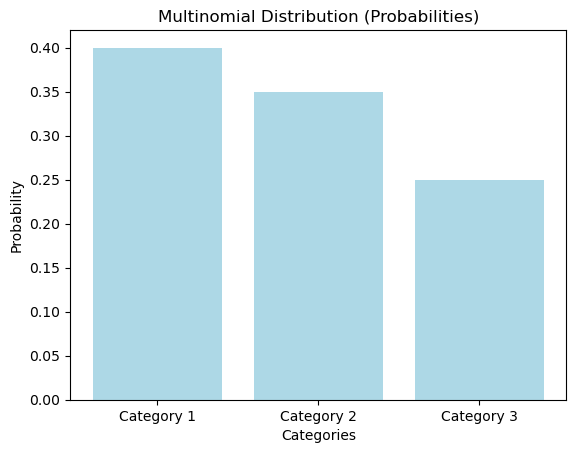

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial

# Parameters of the multinomial distribution
n = 100  # Total number of trials
p = [0.4, 0.35, 0.25]  # Probabilities of the three categories

# Generate a sample from the multinomial distribution
sample = multinomial.rvs(n=n, p=p, size=1)[0]

# Visualize the multinomial distribution
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, p, color='lightblue')
plt.title("Multinomial Distribution (Probabilities)")
plt.xlabel("Categories")
plt.ylabel("Probability")
plt.show()

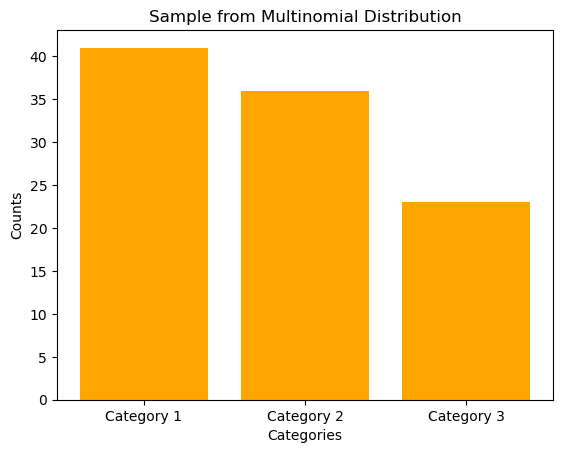

In [33]:
# Visualize the multinomial sample
plt.bar(categories, sample, color='orange')
plt.title("Sample from Multinomial Distribution")
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.show()

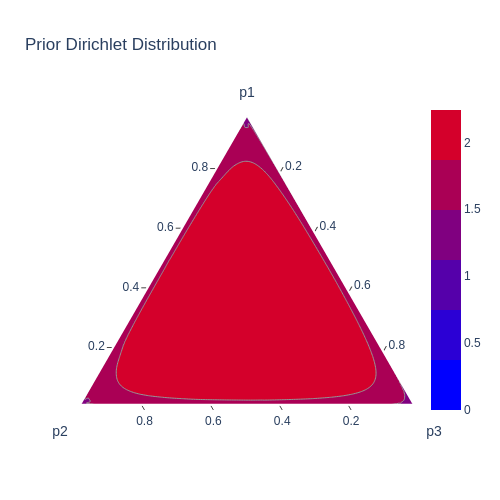

In [29]:
# Create a structured grid over the simplex
p1 = np.linspace(0, 1, 100)
p2 = 1 - p1.copy()
p_ = np.linspace(0, 1, 100)
p1 = (p1[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p2 = (p2[np.newaxis, :] * p_[:, np.newaxis]).flatten()
p3 = 1 - p1 - p2
p = np.c_[p1, p2, p3]

# Filter points to ensure they lie within the simplex
p = p[p[:, 2] >= 0]

# Define prior alpha parameters
alpha_prior = np.array([1.1, 1.1, 1.1])

# Compute prior Dirichlet densities
dirichlet_prior = dirichlet(alpha=alpha_prior)
prior_densities = dirichlet_prior.pdf(p.T)

# Define observed multinomial sample
multinomial_sample = np.array([40, 35, 25])  # Example observed counts

# Compute posterior alpha parameters
alpha_posterior = alpha_prior + multinomial_sample

# Compute posterior Dirichlet densities
dirichlet_posterior = dirichlet(alpha=alpha_posterior)
posterior_densities = dirichlet_posterior.pdf(p.T)

# Visualize prior Dirichlet distribution on a ternary plot
fig_prior = ff.create_ternary_contour(
    p.T,
    prior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    title="Prior Dirichlet Distribution"
)
fig_prior.show('png')



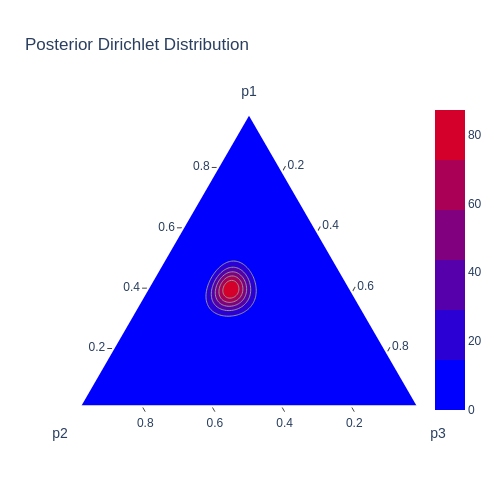

Prior alpha values: [1.1 1.1 1.1]
Posterior alpha values: [41.1 36.1 26.1]


In [35]:
# Visualize posterior Dirichlet distribution on a ternary plot
fig_posterior = ff.create_ternary_contour(
    p.T,
    posterior_densities,
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True,
    title="Posterior Dirichlet Distribution"
)
fig_posterior.show('png')

# Print prior and posterior alpha values
print(f"Prior alpha values: {alpha_prior}")
print(f"Posterior alpha values: {alpha_posterior}")